# 最基本的学习 - 非(not)

In [4]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


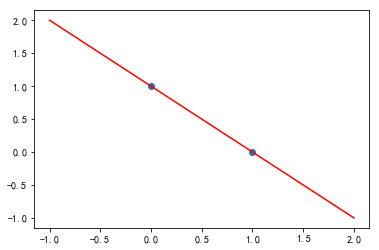

In [16]:
#输入数据的处理
x = np.array([[0.0],
             [1.0]])
y = np.array([[1.0],[0.0]])
#模型训练
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
model.fit(x,y,epochs=10000,verbose=0)
# 可视化
line_x = np.linspace(-1,2,10).reshape([-1,1])
line_y = model.predict(line_x)

plt.scatter(x.reshape(2),y.reshape(2))
plt.plot(line_x,line_y,color='r')

# 最基本的学习 - 与(and)

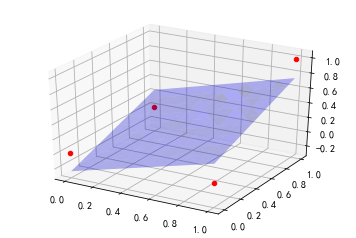

In [17]:
import tensorflow as tf
import numpy as np

#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]],dtype=np.float32)
y = np.array([[0],[0],[0],[1]],dtype=np.float32)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
model.fit(x,y,epochs=10000,verbose=0)

# 可视化
############################################################
line_y = np.linspace(0,1,10).repeat(10).reshape([10,10])
line_x = line_y.T
line_x = line_x.flatten()
line_y = line_y.flatten()
x_input = np.hstack([line_x[:,None],line_y[:,None]])
line_z = model.predict(x_input)

from mpl_toolkits.mplot3d import Axes3D,axes3d
import matplotlib.pyplot as plt
import numpy as np
 
 

x,y,z = axes3d.get_test_data(0.05)
x,y,z=x.flatten(), y.flatten(), z.flatten()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(0,0,0,color='r')
ax.scatter(0,1,0,color='r')
ax.scatter(1,0,0,color='r')
ax.scatter(1,1,1,color='r')
# ax.plot_wireframe(x, y, z, rstride=10, cstride=10)
ax.plot_trisurf(line_x,line_y,line_z.flatten(),alpha=0.3,color='b' )

plt.show()
################################################################

# 最基本的学习 - 或(or)

In [19]:
#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]],dtype=np.float32)
y = np.array([[0],[1],[1],[1]],dtype=np.float32)
# 模型训练
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
model.fit(x,y,epochs=10000,verbose=0)

model.predict(x)

array([[0.25000042],
       [0.7500002 ],
       [0.7499999 ],
       [1.2499998 ]], dtype=float32)

# 稍微有难度的学习：异或(xor)
——为什么深度学习会兴起

In [ ]:
# 一是足够多的数据，二是有足够复杂的神经网络

In [21]:
#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]],dtype=np.float32)
y = np.array([[1],[0],[0],[1]],dtype=np.float32)
# 占位符
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
model.fit(x,y,epochs=10000,verbose=0)

model.predict(x)

array([[0.5000006 ],
       [0.5000002 ],
       [0.5000002 ],
       [0.49999982]], dtype=float32)

发生了什么？机器学习在学习异或的时候是失灵的，或者换句话说，对于异或，单层的机器学习并没有学习到任何信息。那么，多层神经网络能否学习到一些新的信息呢？

In [ ]:
一个新的函数：relu函数（整流线型单元，（rectified linear unit）

                        该激活函数是被推荐用于大多数前馈神经网络的默认激活函数。将此
函数用于线性变换的输出将产生非线性变换。然而，函数仍然非常接近线性，在这种意义上它是
具有两个线性部分的分段线性函数。由于整流线性单元几乎是线性的，因此它们保留了许多使得
线性模型易于使用基于梯度的方法进行优化的属性。它们还保留了许多使得线性模型能够泛化良
好的属性。计算机科学的一个通用原则是，我们可以从最小的组件构建复杂的系统。就像图灵机
的内存只需要能够存储0 或1 的状态，我们可以从整流线性函数构建一个万能函数近似器。

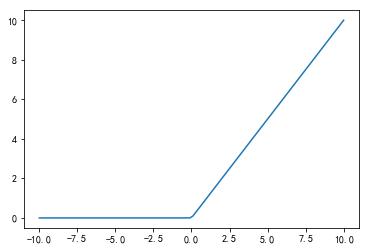

In [7]:
import tensorflow as tf
import numpy as np
with tf.Session() as sess:
    x = np.linspace(-10,10,100)
    y = tf.nn.relu(x)
    res = sess.run(y)
plt.plot(x,res)

In [25]:
#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]],dtype=np.float32)
y = np.array([[0],[1],[1],[0]],dtype=np.float32)
# 占位符
model = tf.keras.Sequential([tf.keras.layers.Dense(2,activation=tf.nn.relu),
                            tf.keras.layers.Dense(1)])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
model.fit(x,y,epochs=10000,verbose=0)

print(model.predict(x))
# 后续作图的准备
line_y = np.linspace(0,1,10).repeat(10).reshape([10,10])
line_x = line_y.T
line_x = line_x.flatten()
line_y = line_y.flatten()
x_input = np.hstack([line_x[:,None],line_y[:,None]])
line_z = model.predict(x_input)

[[-1.8149393e-09]
 [ 9.9999994e-01]
 [ 1.0000000e+00]
 [ 6.1419584e-08]]


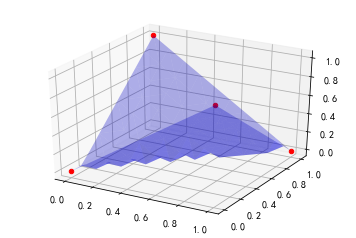

In [26]:
from mpl_toolkits.mplot3d import Axes3D,axes3d
import matplotlib.pyplot as plt
import numpy as np
 
 

x,y,z = axes3d.get_test_data(0.05)
x,y,z=x.flatten(), y.flatten(), z.flatten()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(0,0,0,color='r')
ax.scatter(0,1,1,color='r')
ax.scatter(1,0,1,color='r')
ax.scatter(1,1,0,color='r')
# ax.plot_wireframe(x, y, z, rstride=10, cstride=10)
ax.plot_trisurf(line_x,line_y,line_z.flatten(),alpha=0.3,color='b' )

plt.show()

隐藏层成功的学习到了更多的信息，帮助我们更好的完成了分类任务！让我们看看这个神经网络训练出来的三维面是什么样子的

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

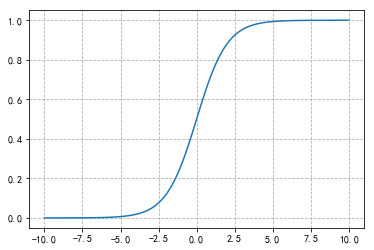

In [6]:
import tensorflow as tf
import numpy as np
with tf.Session() as sess:
    x = np.linspace(-10,10,100)
    y = tf.nn.sigmoid(x)
    res = sess.run(y)
plt.plot(x,res)
plt.grid(linestyle='--')
# plt.xticks([])
# plt.yticks([])

$$y=a \cdot \frac{1}{1+e^{-b(year-c)}}$$

In [70]:
#一个更加有用一点的loss函数：
# loss=z * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
# 其中z是标签，x是logits（对数几率，也就是）的值
# 这个函数的名字叫做交叉熵函数，事实上，逻辑回归就是用的这个激活函数，tensorflow内部已经有了实现，它位于
# tf.losses.sigmoid_cross_entropy,想了解更多的信息，可以阅读信息论中相关知识
# baike地址：
# https://baike.baidu.com/item/%E4%BA%A4%E5%8F%89%E7%86%B5